En primer lugar vamos a importar las librerias necesarias para leer los documentos con los formatos correspondientes.

In [1]:
import re
import csv
import itertools

Ahora leemos todo el archivo y lo almacenamos en un string.

In [2]:
with open('./data/pubmed-exendin-4-set.txt', encoding="utf8") as f:
    my_text = f.read()

In [3]:
#my_text

Ahora, el método len() devuelve la longitud de la lista de artículos científicos sobre la exendin-4.

In [4]:
len(my_text)

13090547

Para evitar problemas con el zipcode del archivo txt, se sustituye cada nueva línea seguida de 6 espacios por un solo espacio.

In [5]:
my_text = re.sub(r'\n\s{6}', ' ', my_text)

Ahora visualizamos las modificaciones que hicimos en el archivo my text sobre los zipcode.

In [6]:
print(my_text[:2000])

PMID- 31070270
OWN - NLM
STAT- MEDLINE
DCOM- 20200511
LR  - 20210109
IS  - 1099-1344 (Electronic)
IS  - 0362-4803 (Print)
IS  - 0362-4803 (Linking)
VI  - 62
IP  - 10
DP  - 2019 Aug
TI  - Exendin-4 analogs in insulinoma theranostics.
PG  - 656-672
LID - 10.1002/jlcr.3750 [doi]
AB  - Insulinomas, neuroendocrine tumors arising from pancreatic beta cells, often show  overexpression of the glucagon-like peptide-1 receptor. Therefore, imaging with  glucagon-like peptide analog exendin-4 can be used for diagnosis and preoperative  localization. This review presents an overview of the development and clinical  implementation of exendin-based tracers for nuclear imaging, and the potential use  of exendin-4 based tracers for optical imaging and therapeutic applications such as  peptide receptor radionuclide therapy or targeted photodynamic therapy.
CI  - © 2019 The Authors Journal of Labelled Compounds and Radiopharmaceuticals Published  by John Wiley & Sons Ltd.
FAU - Jansen, Tom J P
AU  - Jans

A continuación, creamos una nueva lista con los zipcodes.

In [7]:
zipcodes = re.findall(r'AD.+, (.+[a-z-A-Z]).  ?Electronic|AD.+, (.+[a-z-A-Z]).  [^\s<>"]+@[^\s<>"]+|AD.+, (.+[a-z-A-Z]). [^\s<>"]+@[^\s<>"]+|AD.+,  ?(.+[a-z-A-Z]).?|', my_text)

flat_list = itertools.chain(*zipcodes)
flat_list=list(flat_list)
flat_list

resultantList = [] 
for element in flat_list:
    if element not in resultantList:
        resultantList.append(element)

resultantList[:20]

['',
 'The Netherlands',
 'Switzerland',
 'Belgium',
 'Malaysia',
 'PR China',
 'Korea',
 'India',
 'USA',
 'Turkey',
 'Japan',
 'Republic of Korea',
 'Poland',
 'China',
 'Canada',
 'Germany',
 ' PR China',
 'Xinjiang 833200,China',
 'thus reduces fibrosis and prevents the activation of β-catenin and  collagen deposition',
 'Saudi Arabia']

Luego, mediante len() vemos la longitud de la nueva lista

In [8]:
len(resultantList)

773

In [9]:
unique_zipcodes = list(set(resultantList))
unique_zipcodes.sort()
unique_zipcodes[:10]

['',
 ' Alabama 35294,. Electronic address',
 ' Austria',
 ' Belgium',
 ' Canada',
 ' Chin',
 ' China',
 ' Croatia',
 ' Egypt',
 ' España']

Después, mostramos la lista modificada con los códigos de unique zipcodes.

In [10]:
len(unique_zipcodes)

773

Luego, llamamos un nuevo módulo para trabajar con el archivo csv de los países.

In [11]:
import pandas as pd

Llamamos data al archivo csv de los países.

In [12]:
data = pd.read_csv('./data/countries.csv', engine='python', skipfooter=3)
data.head(5)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


Ahora segregamos con los 10 primeros registros de resultantList

In [13]:
data_name = data[data.name.isin(resultantList)]
data_name.head(10)

,country,latitude,longitude,name
1,AE,23.424076,53.847818,United Arab Emirates
10,AR,-38.416097,-63.616672,Argentina
12,AT,47.516231,14.550072,Austria
13,AU,-25.274398,133.775136,Australia
18,BD,23.684994,90.356331,Bangladesh
19,BE,50.503887,4.469936,Belgium
21,BG,42.733883,25.485830,Bulgaria
22,BH,25.930414,50.637772,Bahrain
28,BR,-14.235004,-51.925280,Brazil
33,BY,53.709807,27.953389,Belarus


Después, vemos con len() de la nueva data filtrada y su longitud.

In [14]:
len(data_name)

66

Luego hacemos lo mismo con la tabla de los países.

In [15]:
data_country = data[data.country.isin(resultantList)]
data_country.head(20)

,country,latitude,longitude,name
15,AZ,40.143105,47.576927,Azerbaijan
35,CA,56.130366,-106.346771,Canada
46,CO,4.570868,-74.297333,Colombia
53,DE,51.165691,10.451526,Germany
72,GA,-0.803689,11.609444,Gabon
100,IL,31.046051,34.851612,Israel
102,IN,20.593684,78.962880,India
134,MA,31.791702,-7.092620,Morocco
136,MD,47.411631,28.369885,Moldova
143,MN,46.862496,103.846656,Mongolia


A continuación, usamos len() para confirmar la longitud de la lista de países.

In [16]:
len(data_country)

17

Ahora vamos a importar pandas y eliminar duplicados de los archivos data_name y data_country.

In [17]:
import pandas as pd 
all_data =pd.concat([data_name,data_country]).drop_duplicates().sort_values('name')

In [18]:
len(all_data)

77

Finalmente importamos matplotlib para crear el gráfico de puntos de los artículos científicos sobre exendin-4.

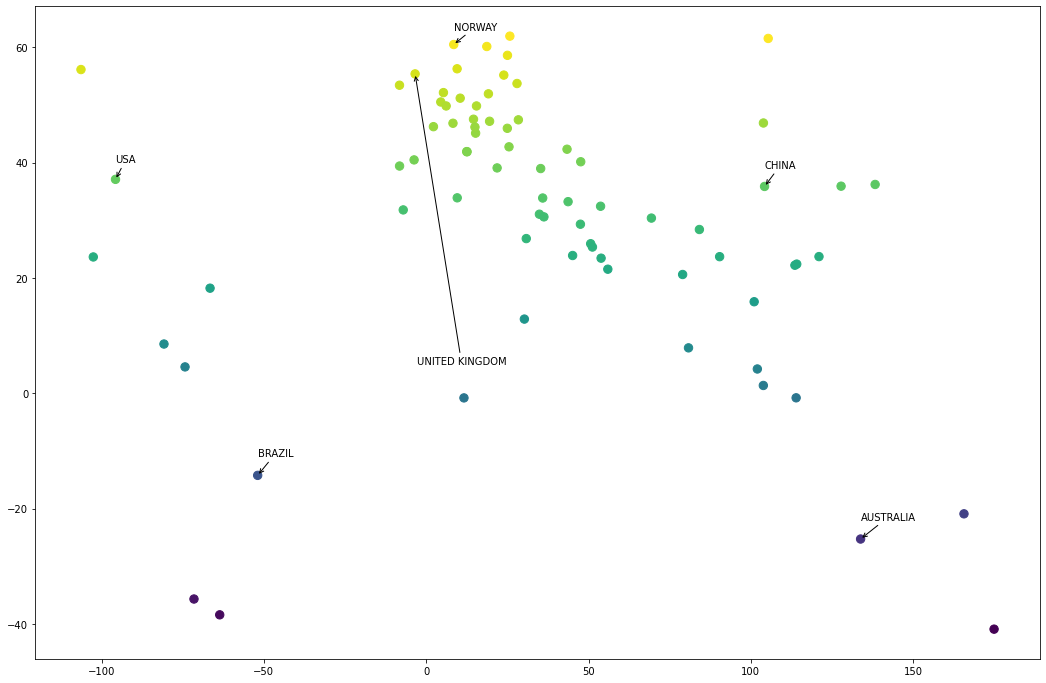

In [20]:
import matplotlib.pyplot as plt
plt.scatter(all_data.longitude, all_data.latitude, s=70, c=all_data.latitude)


ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024), 
               xytext = (-95.712891, 40), arrowprops = ard)
plt.annotate('UNITED KINGDOM', xy = (-3.435973,55.378051), 
               xytext = (-3,5), arrowprops= ard)
plt.annotate('BRAZIL', xy = (-51.92528, -14.235004), 
               xytext = (-51.92528, -11), arrowprops= ard)
plt.annotate('CHINA', xy = (104.195397, 35.86166), 
               xytext = (104.195397, 39), arrowprops= ard)
plt.annotate('AUSTRALIA', xy = (133.775136, -25.274398), 
               xytext = (133.775136, -22), arrowprops= ard)
plt.annotate('NORWAY', xy = (8.468946, 60.472024), 
               xytext = (8.468946, 63), arrowprops= ard)

params = plt.gcf()
plSize = params.get_size_inches()
params.set_size_inches( (plSize[0] * 3, plSize[1] * 3) )

#USA UK BRASIL CHINA AUSTRALIA NORWAY